# Imports, loading and checking the dataset

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

font = {'family' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

In [2]:
df = pd.read_csv('mypersonality_final/mypersonality_final.csv',
                 encoding = 'latin_1')

Let's get a first look at one typical line of the dataset

In [3]:
df.head(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


The dataset is mostly clean. During the manual exploratory analysis in the file, there are some minor column inversion errors, which do not seem to interfere with loading the data or viewing the results

What are the numerical features of the dataset ? How are they distributed ?

In [4]:
df.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03,9917.000000,9917.000000,9.917000e+03,9917.000000,9916.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386,429.377120,1.354253e+05,94.665170,3.154012,1.376425e+05,0.489920,0.128821
std,0.857578,0.760248,0.682485,0.737215,0.585672,428.760382,1.994338e+05,5.506696,311.073343,2.013921e+05,0.011908,0.106063
min,1.330000,1.250000,1.650000,1.450000,2.250000,24.000000,9.325000e+01,0.040000,0.000000,4.900000e-01,0.180000,0.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,196.000000,1.690220e+04,93.770000,0.010000,1.798200e+04,0.490000,0.060000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,317.000000,4.716690e+04,96.440000,0.020000,4.868300e+04,0.490000,0.090000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,633.000000,1.966060e+05,97.880000,0.030000,1.981860e+05,0.500000,0.170000
max,5.000000,4.750000,5.000000,5.000000,5.000000,29724.900000,1.251780e+06,99.820000,30978.000000,1.263790e+06,0.500000,0.630000






# Part 3

Using the data, compute the following descriptive statistics

* Total number of users – user-level stats

* Total number of status updates – status level stats

* Statistics of status updates per user (Mean, Median, Min, Max, Std)

In [5]:
print('Total number of users :', len(df['#AUTHID'].value_counts()))

Total number of users : 250


In [6]:
print('Total number of status updates :', len(df['STATUS'].value_counts()))

Total number of status updates : 9879


In [7]:
def descriptive_stats(stats):
    
    text = 'Mean : ' + str(np.around(stats.mean(), decimals = 2)) + '\n' +\
           'Median : ' + str(np.around(stats.median(), decimals = 2)) + '\n' +\
           'Min : ' + str(np.around(stats.min(), decimals = 2)) + '\n' +\
           'Max : ' + str(np.around(stats.max(), decimals = 2)) + '\n' +\
           'Std : ' + str(np.around(stats.std(), decimals = 2)) 
    
    return text

In [8]:
print('=== Statistics of status updates per user ===', '\n' + \
      descriptive_stats(df['#AUTHID'].value_counts()))

=== Statistics of status updates per user === 
Mean : 39.67
Median : 25.0
Min : 1
Max : 223
Std : 43.56


One can already note that the differences between users are significant, with a difference of about two orders of magnitude. In particular, one can remark that the average is pulled upwards (relative to the median) because of some users who post a very large number of status. In addition, the dataset seems large enough to be able to draw meaningful conclusions.

# Part 4

Plot the cumulative distribution (like in Slide 20 of Lecture 2 part 1) for

* Number of status updates per user (i.e., at the user level)

* Number of characters per status message (i.e., at the status update level)

In [9]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")

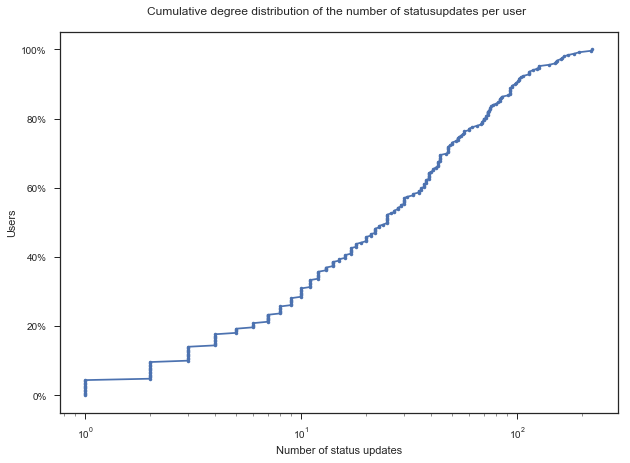

In [10]:
df_ = df['#AUTHID'].value_counts().sort_values(
    ascending = True).reset_index()['#AUTHID']
plt.semilogx(df_.values, df_.index, '.-')
plt.xlabel('Number of status updates')
plt.ylabel('Users')
plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), [
    '0%', '20%', '40%', '60%', '80%', '100%'])
plt.title('Cumulative degree distribution of the number of status' + \
          'updates per user \n')
plt;

The curve is sigmoidal in appearance, with a few more marked steps (especially with the first three steps which include users who have posted 1, 2, or 3 status respectively). We also notice the tail at the top right, which includes about 5-10% of all users, and represents the users who post the most. The head (low activity users) is much bigger, with about 20% of all users.

In [11]:
df['length'] = 0

for ind, item in df['STATUS'].iteritems():
    df['length'][ind] = len(item)    

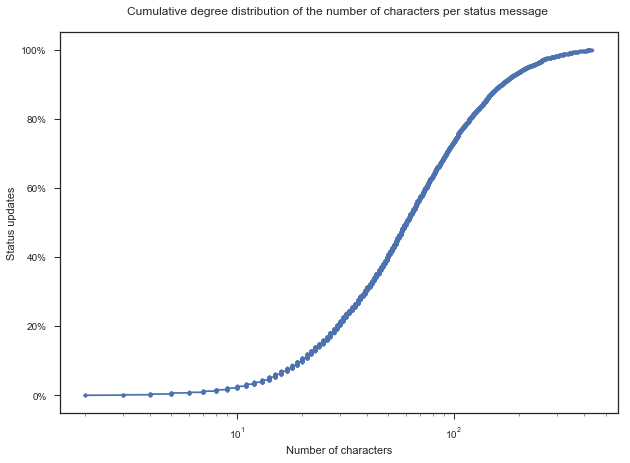

In [12]:
df_ = df['length'].sort_values(ascending = True).reset_index()['length']
plt.semilogx(df_.values, df_.index, '.-')
plt.xlabel('Number of characters')
plt.ylabel('Status updates')
plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), [
    '0%', '20%', '40%', '60%', '80%', '100%'])
plt.title('Cumulative degree distribution of the number of' +  
          ' characters per status message \n')
plt;

This time, the curve is clearly sigmoidal and much smoother. This is because the parameter under which we observe this distribution (the number of characters) has a higher granularity, which limits the step effect. The distribution is better centered this time, since the head and tail each represent about 10% of the users, in a relatively equal way. One could conclude that there is less sparsity w.r.t the length of the status than with the number of status posted.

## General comments on part 4

These curves illustrate well the different users of social networks. Some use it very little while others use it much more often. The statuses are of variable length, since facebook does not have a limit as low and strict as Twitter, regarding the length of the statuses.

# Part 5
For 2 of the 7 network features (Network Size, and a second feature of your own choice), do the following:

* Compute descriptive statistics for each feature per user (Mean, Median, Min, Max, Std)

* Plot the cumulative distribution for each feature per user.


In [13]:
def textual_description(df, feature, feature_name = None):
    
    if feature_name == None :
        feature_name = feature.lower()
    
    df_ = df[['#AUTHID', feature]].drop_duplicates(['#AUTHID'])[feature]
    
    print('=== Statistics of', feature_name, 'per user === \n' + \
          descriptive_stats(df_))
    
    return None

In [14]:
def visual_description(df, feature, feature_name = None, type_ = 'log'):
    
    if feature_name == None :
        feature_name = feature.lower()
        
    df_ = df[['#AUTHID', feature]].drop_duplicates(['#AUTHID'])[
        feature].sort_values(ascending = True).reset_index()[feature]
    
    if type_ == 'log':
        plt.semilogx(df_.values, df_.index, '.-')
    else:
        plt.plot(df_.values, df_.index, '.-')
        
    plt.ylabel('Users [%]')
    plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), [
        '0%', '20%', '40%', '60%', '80%', '100%'])
    plt.xlabel(feature_name.capitalize())
    plt.title('Cumulative degree distribution of the ' + feature_name \
              + ' per user \n')    
    

In [15]:
textual_description(df, 'NETWORKSIZE', 'network size')

=== Statistics of network size per user === 
Mean : 408.01
Median : 315.0
Min : 24.0
Max : 1596.0
Std : 316.64


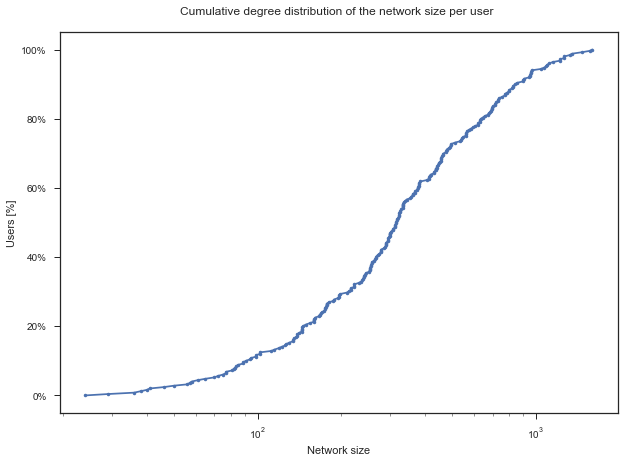

In [16]:
visual_description(df, 'NETWORKSIZE', 'network size')

Here again, one can note a certain sparsity between the different users with regard to the size of their network. About 15% of the users have a rather small network (under 100), while 10% of the users have a large network (over 1000).

In [17]:
textual_description(df, 'BETWEENNESS')

=== Statistics of betweenness per user === 
Mean : 128936.8
Median : 46636.1
Min : 185.71
Max : 1251780.0
Std : 204807.61


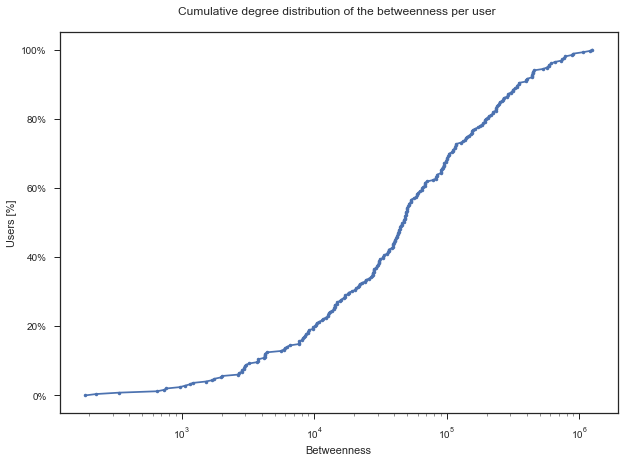

In [18]:
visual_description(df, 'BETWEENNESS')

The betweenness distribution profile is very much like the network size distribution profile, but covers a wider range of values of about four orders of magnitude. This is reflected in the very high standard deviation. This important deviation seems to make sense, as some people are occupying a very central role in the social network, while others are located more on the fringe of it.

## General comments on part 5

The fact that the cumulative distributions are expressed as regular sigmoids implies that the values follow a Gaussian distribution among users. That Gaussian distribution is not surprising as it is found in most sociological studies. All people are therefore more or less close to an average value. It seems indeed impossible to have a social network that exceeds someone else's by many orders of magnitude, even on facebook. This observation also allows us to draw a parallel with Dunbar's theory. In terms of betweenness centrality, the extreme values are also contrained for mathematical reasons, since the network is limited in size and since no real-existing social network is adopting extreme shapes, such as star-shaped network.

# Part 6
For the 5 personality trait features, do the following:

* Compute descriptive statistics for each trait per user (Mean, Median, Min, Max, Std)

* Plot the cumulative distribution for each big-5 trait per user.

In [19]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY',
       'length'],
      dtype='object')

In [20]:
textual_description(df, 'sEXT', 'extraversion')

=== Statistics of extraversion per user === 
Mean : 3.29
Median : 3.3
Min : 1.33
Max : 5.0
Std : 0.86


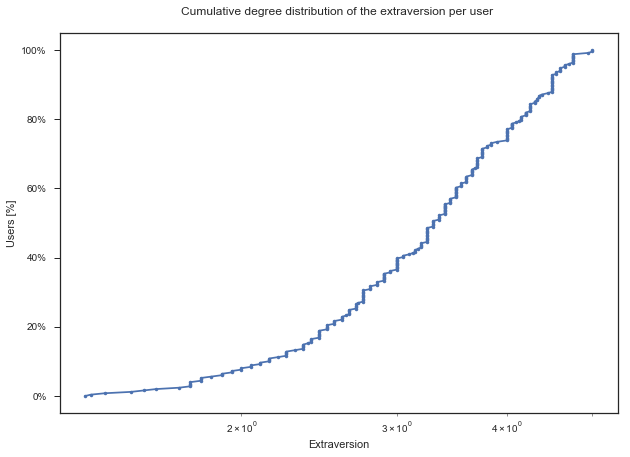

In [21]:
visual_description(df, 'sEXT', 'extraversion')

We notice the absence of a tail at this distribution. This means that there are no "super-extraverted" people who demonstrate outstanding extroversion. On the other hand, there is a core group of introverted people, who represent about 15% of the population. As expected of course, most people lie somewhere in the middle.

In [22]:
textual_description(df, 'sNEU', 'neuroticism')

=== Statistics of neuroticism per user === 
Mean : 2.63
Median : 2.59
Min : 1.25
Max : 4.75
Std : 0.78


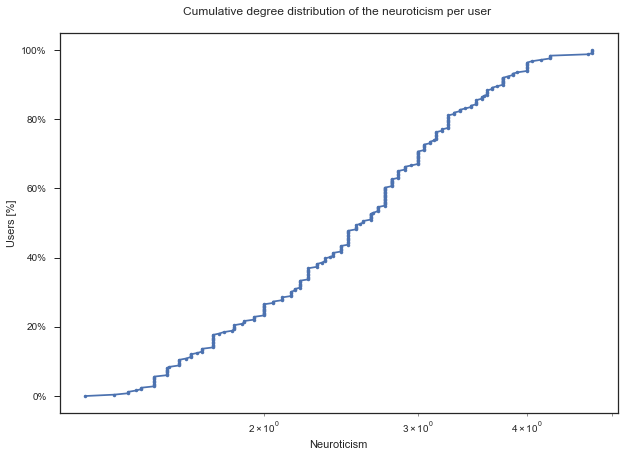

In [23]:
visual_description(df, 'sNEU', 'neuroticism')

The tail and head again have very few people (about 5-7 each time), while the vast majority of people are in intermediate values.

In [24]:
textual_description(df, 'sAGR', 'agreeableness')

=== Statistics of agreeableness per user === 
Mean : 3.6
Median : 3.66
Min : 1.65
Max : 5.0
Std : 0.67


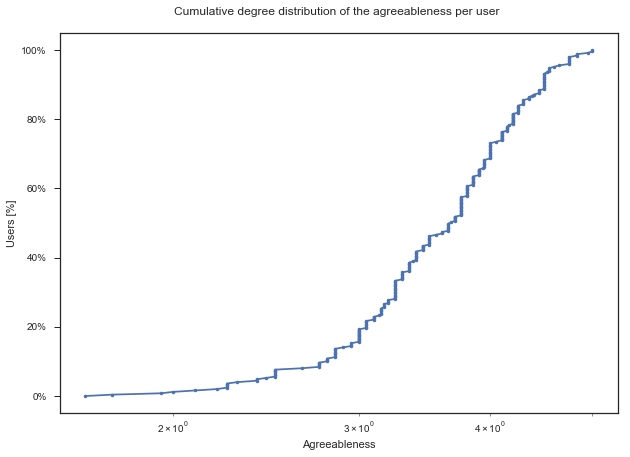

In [25]:
visual_description(df, 'sAGR', 'agreeableness')

Here, the distribution is distorted. We have a very long head, which means that some people (at least 10) are well below the median, with a very low level of agreeableness compared to the rest of the group.

In [26]:
textual_description(df, 'sCON', 'conscientiousness')

=== Statistics of conscientiousness per user === 
Mean : 3.52
Median : 3.5
Min : 1.45
Max : 5.0
Std : 0.74


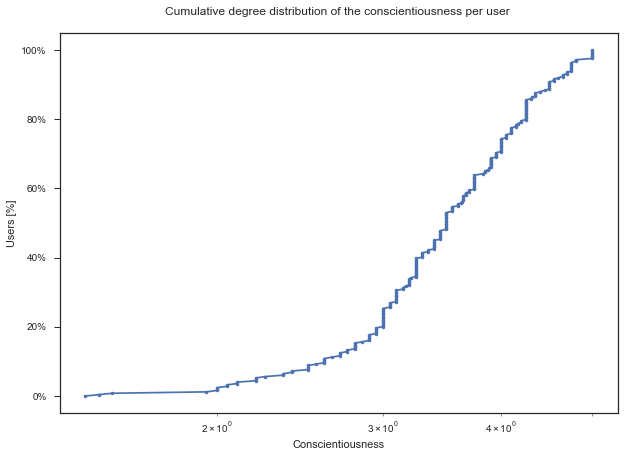

In [27]:
visual_description(df, 'sCON', 'conscientiousness')

Here again, the distribution is distorted. We have a very long head, with at least three people who appear to be complete outliers (with a very low level of conscientiousness).

In [28]:
textual_description(df, 'sOPN', 'openness')

=== Statistics of openness per user === 
Mean : 4.08
Median : 4.15
Min : 2.25
Max : 5.0
Std : 0.58


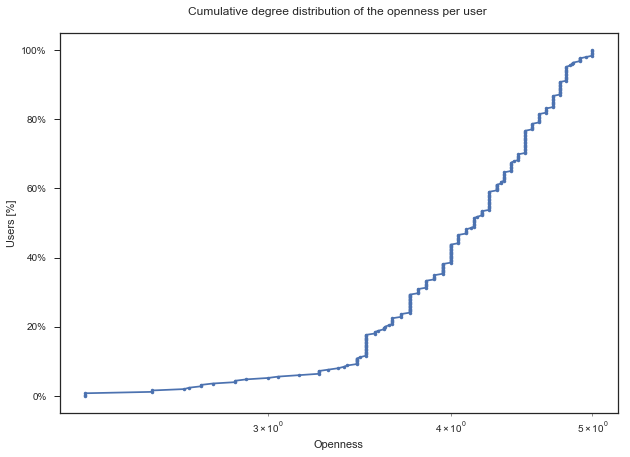

In [29]:
visual_description(df, 'sOPN', 'openness')

In this distribution, we notice that there is no tail, but a very long head. On the one hand, this means that there is no one who stands out for their particularly high openness. On the other hand, a group of about 10% of people have a remarkably low level of openness (defined as unimaginative personality).

## General comments on part 6

Not surprisingly, the personalities also roughly follow a Gaussian distribution. Extreme personalities are indeed only theoretical, so that most personalities are close to the middle, i.e. with idiosyncrasy which is compromise between extremes. We notice that the Gaussian are slightly shifted downwards, which implies that the questions slightly bias the result towards "the negative pole" (i.e. antonymous to the name of the scale) of the 5 lines of the bipolar scales.

Ideally, since indicators measure relative rather than absolute values, the population average should be at the centre of the indicator scale, so that the scaling can be used to best advantage. In this case, the indicator should be operationalized so that the median of individuals is, for example, 0.5 on 1 on the scales. It could also make it easier to read the results of a test. In the current state, for example, someone who scores 0.4 on the extroversion scale is part of the most extroverted quartile, whereas the value obtained could, on the contrary, suggest that he or she is in the least extroverted half of the population. Thanks to this large dataset, it is now possible to better locate where the median is and it would also allow to rescale the test according to it.

# Part 7
Compute a correlation matrix (at the user level), indicating correlation values and p-values for

* Big-5 traits (5x5 matrix)

* Big-5 traits vs. network features (5x7 matrix)

In [30]:
font = {'family' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("ticks")

In [31]:
def compute_p_val(df):
    
    cols = pd.DataFrame(columns = df.columns)
    p_val = cols.transpose().join(cols, how = 'outer')
    
    for col_1 in df.columns:
        for col_2 in df.columns:
            p_val[col_1][col_2] = np.around(pearsonr(
                df[col_1], df[col_2])[1], decimals = 5)
            
    return p_val

In [32]:
df_traits_vs_traits = df.drop_duplicates(
    subset = '#AUTHID')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']]

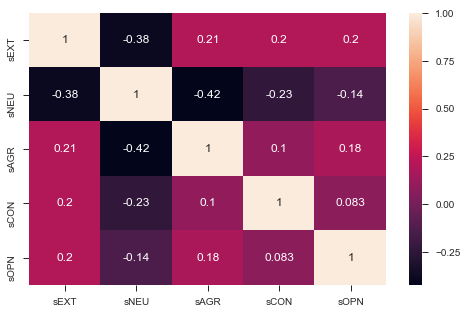

In [33]:
sns.heatmap(df_traits_vs_traits.corr(), annot = True);

In [34]:
compute_p_val(df_traits_vs_traits)

,sEXT,sNEU,sAGR,sCON,sOPN
sEXT,0,0,0.00109,0.0014,0.00125
sNEU,0,0,0,0.00018,0.03269
sAGR,0.00109,0,0,0.11601,0.00438
sCON,0.0014,0.00018,0.11601,0,0.19295
sOPN,0.00125,0.03269,0.00438,0.19295,0


Let's consider that a correlation is significant if and only if its p-value is under α = 0.05.

One can note that the various features are not independent. This is a major issue in social models, as it is very difficult to define independent markers in sociology. In that case, the correlation is especially strong between agreeableness and neuroticism (0.4 negative correlation) and between neuroticism and extraversion (0.4 negative correlation as well).

Most of the correlations in the table are significant, except for the correlations between agreeableness and conscientiousness, and the correlation between conscientiousness and openness. This does not mean that these pairs of variables can therefore be definitively considered as independent, but it does mean that we cannot reject the null hypothesis (i.e. that the correlation is null, therefore that the variables are independent) in these cases.

************************

From a psychological perspective, the correlations that emerge from this table make sense. Indeed, the social contact of neurotic people is unpredictable, which necessarily implies a higher probability of being non-cooperative rather than pleasant. Social contact is also made more difficult, which explains a lower extroversion. Their emotional personality can make them careless and less thoughtful.

For similar reasons, the correlations observed between extroversion on the one hand and agreeableness, openness and conscientiousness on the other are not surprising.

In [35]:
df_traits_vs_features = df.drop_duplicates(subset = '#AUTHID')[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN',
    'NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY',
    'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']]

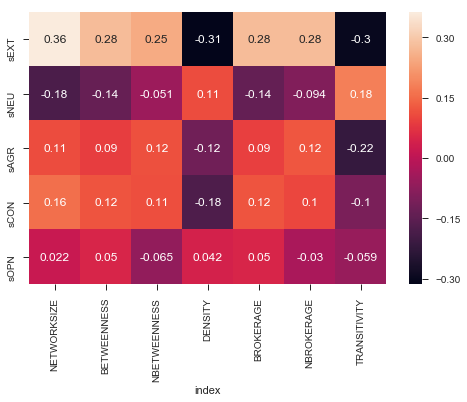

In [36]:
sns.heatmap(df_traits_vs_features.corr()[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].reset_index()[
    5:12].set_index(['index']).transpose(), annot=True);

In [37]:
compute_p_val(df_traits_vs_features)[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].reset_index()[
    5:12].set_index(['index']).transpose()

index,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
sEXT,0,1e-05,6e-05,0,1e-05,1e-05,0
sNEU,0.00426,0.0313,0.42193,0.0795,0.03041,0.14035,0.00419
sAGR,0.07893,0.15536,0.06796,0.05824,0.1539,0.05386,0.00057
sCON,0.01324,0.05633,0.07844,0.00531,0.05544,0.10765,0.10152
sOPN,0.73334,0.43204,0.3032,0.50507,0.43537,0.63865,0.35412


Let's consider that a correlation is significant if and only if its p-value is under α = 0.05.

In the table above, we can see the impact of the different idiosyncrasies on the characteristics of the network. We notice at the outset that some features have a significant impact, such as extroversion, and that others have only a negligible impact (such as openness).

Extroversion has a significant positive impact on network size, betweenness and brokerage capacity. This seems logical, as these variables are probably also correlated with each other. On the other hand, the network of extroverted people tends to have a significantly lower density and transitivity. Agreeableness and conscientiousness tend to have an effect similar to extroversion, but unfortunately, p-values do not confirm this hypothesis in most cases.

Neuroticism has an inverse profile to that of extroversion on networksize, betweenness, brokerage and transitivity, although with a lesser impact. For nbetweenness, nbrokerage and density, we cannot conclude. This tendency is not strange insofar as we saw above that extroversion and neuroticism are negatively correlated. It is therefore logical that they have the opposite effect on the explanation of the variables.

There is absolutely nothing to conclude about openness because the p-values are far too high.

************************

From a psychological point of view, it is not surprising to note that extroverted people have a clearly larger network than other people. By definition, their extroversion allows them to connect more quickly and easily. On the other hand, their position in the social network is more central (high betweenness centrality). Their outgoing personality allows them to play a pivotal role between several different people and groups (this is also reflected in their high level of brokerage). Similarly, they are characterized by low transitivity, which implies a low degree of homophilia, maybe because they will easily move out of their comfort zone to socialize with people with whom they share few friends.

Not surprisingly, neurotic people have very different characteristics. This makes sense since we noted above a significant negative correlation between extroversion and neuroticism. They have a smaller network because their unpredictable temperament may make them seem unreliable to others. This also impacts their betweenness centrality, probably because other people will be reluctant to give them responsibilities and a leadership role (also visible through low brokerage). We have seen that it was not possible to conclude that the density of their network was significant (.08). It is therefore only possible to highlight a trend towards higher density, which could be explained by the fact that with a smaller and closer network, homophilia is higher. This is in any case indicated by a propensity for higher transitivity.

As we have seen, it is difficult to conclude that a agreeable personality has a significant impact on the social network. Only trends emerge, suggesting in particular a possibly more extensive network, which could be explained by the conciliatory nature of agreeable people, as well as a low network density, which implies a lower homophilia. In fact, we notice in particular a significantly lower transitivity. This means that agreeable people do not especially seek to become friends with friends of their friends, but also with other people.

The network of conscientious people tends to be more extensive, which can be explained by their high degree of reliability. Their network also clearly has a low density, and therefore a greater heterogeneity. Without being able to confirm anything, a trend could also emerge towards a higher betweenness centrality and a higher brokerage, which may indicate that conscientious people could play a leading or mediating role.

Openness seems not to be a factor of real impact on the social network. The p-values related to it are so low, that it is barely probable that it would be possible to reject the null hypothesis, even with a larger sample.


_Rémi Petitpierre, EPFL_